In [1]:
import pandas as pd
from functools import reduce
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

In [2]:
words_file = 'words.xlsx'
words_df = pd.read_excel(words_file)

senses_file = 'senses.xlsx'
senses_df = pd.read_excel(senses_file)

synsets_file = 'synsets.xlsx'
synsets_df = pd.read_excel(synsets_file)

### The WordNet Dictionary

In [3]:
words_df

,wordid,lemma
0,51421,matino
1,51420,hanapbuhay
2,51419,trabaho
3,51418,matibay
4,51417,matatag
5,51416,matanda
6,51415,may-edad
7,51413,okey
8,51414,oo
9,51412,lengguwahe


### The Senses

In [4]:
senses_df = senses_df[['wordid','synsetid','senseid']]
senses_df

,wordid,synsetid,senseid
0,51758,113050340,50654
1,51757,113049369,50653
2,51756,113052329,50652
3,51755,108368617,50651
4,51754,108361841,50650
5,51753,108361841,50649
6,51752,108196765,50648
7,51751,108196765,50647
8,51750,108188121,50646
9,51749,108185680,50645


### The Synsets

In [5]:
synsets_df = synsets_df[['synsetid','pos','lexdomainid','definition','lastmodifier','sumo']]
synsets_df

,synsetid,pos,lexdomainid,definition,lastmodifier,sumo
0,104896629,n,0,tao o kaya hayop na meroon authorita sa mga ga...,1,NaN
1,102652148,n,0,ginawa upang may mailagay ang mga basura,1,NaN
2,301861808,a,0,hindi nagsasalita o kaya hindi maingay,1,NaN
3,100245419,n,0,hugasan ang katawan ng isang tao,1,NaN
4,301010002,s,0,masarap sa ilong,1,NaN
5,113187861,v,0,walang liwanag o kaya wala makita,1,NaN
6,300171229,s,0,mabilis malinmotan ang isang pangyayari o kaya...,1,NaN
7,106910750,n,0,bumitaw pababa ang isang gamit,1,NaN
8,106022078,n,0,listahan ng mga talumpati,1,NaN
9,106215070,v,0,testo na pinapahiwatig sa ibang lugar,1,NaN


In [6]:
#combine the words dataframe and senses dataframe based on a  common value which is wordid
#this will let us make use of the synsetids to find the various descriptions of the word
combined_df = pd.merge(words_df, senses_df, on=['wordid'])
combined_df

,wordid,lemma,synsetid,senseid
0,51421,matino,302262136,50225
1,51420,hanapbuhay,100553013,50224
2,51419,trabaho,100553013,50223
3,51419,trabaho,100584367,52818
4,51418,matibay,301086211,50361
5,51418,matibay,301973490,50222
6,51418,matibay,302275412,62308
7,51417,matatag,301973490,50221
8,51416,matanda,301592230,50220
9,51416,matanda,110749123,51260


In [7]:
wordnet = pd.merge(combined_df,synsets_df, on=['synsetid'])
wordnet

,wordid,lemma,synsetid,senseid,pos,lexdomainid,definition,lastmodifier,sumo
0,51421,matino,302262136,50225,a,0,nasa tamang pagiisip,1,NaN
1,49082,maayos,302262136,50226,a,0,nasa tamang pagiisip,1,NaN
2,51420,hanapbuhay,100553013,50224,n,0,paraan ng pamumuhay,1,NaN
3,51419,trabaho,100553013,50223,n,0,paraan ng pamumuhay,1,NaN
4,51419,trabaho,100584367,52818,n,0,propesyon na kung saan ikaw ay kumikita,1,Position
5,53524,obra,100584367,52817,n,0,propesyon na kung saan ikaw ay kumikita,1,Position
6,53525,gawain,100584367,52819,n,0,propesyon na kung saan ikaw ay kumikita,1,Position
7,51418,matibay,301086211,50361,a,0,mahirap sirain,1,NaN
8,51521,makunat,301086211,50360,a,0,mahirap sirain,1,NaN
9,51418,matibay,301973490,50222,a,0,hindi mabilis sirain,1,NaN


In [8]:
wordnet_cleaned = wordnet[wordnet['definition'].notna()] #remove NANs
wordnet_cleaned['sumo'].fillna('None', inplace=True)
wordnet_cleaned['definition'].fillna(' ', inplace=True)
wordnet_cleaned

c:\users\joseph imperial\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,wordid,lemma,synsetid,senseid,pos,lexdomainid,definition,lastmodifier,sumo
0,51421,matino,302262136,50225,a,0,nasa tamang pagiisip,1,None
1,49082,maayos,302262136,50226,a,0,nasa tamang pagiisip,1,None
2,51420,hanapbuhay,100553013,50224,n,0,paraan ng pamumuhay,1,None
3,51419,trabaho,100553013,50223,n,0,paraan ng pamumuhay,1,None
4,51419,trabaho,100584367,52818,n,0,propesyon na kung saan ikaw ay kumikita,1,Position
5,53524,obra,100584367,52817,n,0,propesyon na kung saan ikaw ay kumikita,1,Position
6,53525,gawain,100584367,52819,n,0,propesyon na kung saan ikaw ay kumikita,1,Position
7,51418,matibay,301086211,50361,a,0,mahirap sirain,1,None
8,51521,makunat,301086211,50360,a,0,mahirap sirain,1,None
9,51418,matibay,301973490,50222,a,0,hindi mabilis sirain,1,None


### Using the WordNet

In [9]:
#word = input("Enter a word to be searched from the WordNet:")

In [10]:
word = 'hayop'

In [11]:
queried = wordnet[wordnet['lemma'] == word] 
queried['definition'].fillna(' ', inplace=True)
queried

c:\users\joseph imperial\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,wordid,lemma,synsetid,senseid,pos,lexdomainid,definition,lastmodifier,sumo
319,51259,hayop,100015388,50025,n,0,Kahit anong may buhay na hindi tao,1,Animal


In [12]:
word_list = []
def_list = []
for index,row in queried.iterrows():
    word_list.append(row.lemma)
    def_list.append(row.definition)
    
print(word_list)
print(def_list)

['hayop']
['Kahit anong may buhay na hindi tao']


### Finding senses from the WordNet

In [13]:
#search for same defitions
for i in def_list:
    df = wordnet[(wordnet['definition'] == i)] 
    for j in df['lemma']:
        if j not in word_list:
            df2 = wordnet[wordnet['lemma'] == j] 
            queried = pd.concat([queried,df2])
            word_list.append(j)

In [14]:
queried

,wordid,lemma,synsetid,senseid,pos,lexdomainid,definition,lastmodifier,sumo
319,51259,hayop,100015388,50025,n,0,Kahit anong may buhay na hindi tao,1,Animal
317,51261,palahayupan,100015388,50027,n,0,Kahit anong may buhay na hindi tao,1,Animal
318,51260,kinapal,100015388,50026,n,0,Kahit anong may buhay na hindi tao,1,Animal


#### Transforming our queries

In [15]:
query_list = []
for index,rows in queried.iterrows():
    my_list = [rows.lemma, rows.pos, rows.definition, rows.sumo]
    print(my_list)
    query_list.append(my_list)

['hayop', 'n', 'Kahit anong may buhay na hindi tao', 'Animal']
['palahayupan', 'n', 'Kahit anong may buhay na hindi tao', 'Animal']
['kinapal', 'n', 'Kahit anong may buhay na hindi tao', 'Animal']


### Visualizing WordNet queries

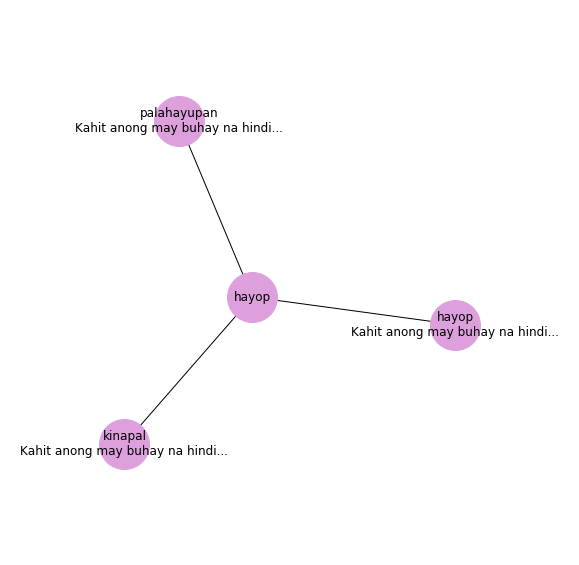

In [21]:
fig = plt.figure(figsize=(10, 10))
fig.tight_layout()

G = nx.Graph()

counter = 0
new_list = []

for i in query_list:
    name = i[0]
    def_word = str(i[2])
    name = name + '\n' + def_word[:30] + '...'
    new_list.append(name)
    new_list.append(i[2])
    G.add_edge(word, name, weight=0.1, color='gray')
    counter += 1

#create a dictionary of new names and definition
dict_label = {new_list[i]: new_list[i + 1] for i in range(0, len(new_list), 2)} 

pos = nx.spring_layout(G)  # positions for all nodes

# nodes, you can change the color
nx.draw_networkx_nodes(G, pos, node_size=2500, node_shape='o', node_color='plum')

# edges
nx.draw_networkx_edges(G, pos, width=1)

# labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

plt.axis('off')
plt.margins(0.3)
plt.savefig(word,dpi=300)
plt.show()

### Looking at the word again...

In [22]:
pd.set_option('display.max_colwidth',200)
final_map = queried[['lemma','pos','definition','sumo']]
final_map

,lemma,pos,definition,sumo
319,hayop,n,Kahit anong may buhay na hindi tao,Animal
317,palahayupan,n,Kahit anong may buhay na hindi tao,Animal
318,kinapal,n,Kahit anong may buhay na hindi tao,Animal
